
[VGG Architecture Research Paper](https://arxiv.org/pdf/1409.1556.pdf)

Read the section 2.1 - Architecture to understand the architectural details 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F      # All functions that dont have any parameters

import torch.optim as optim
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

In [ ]:
VGG_16 = [64,64, 'M', 128, 128, 'M', 256,256,256, 'M', 512,512,512, 'M', 512,512,512, 'M']

# Then flatten and 3 hidden layers of input_features 4096, 4096 and 1000 respectively


VGG_types = {
    "VGG11": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG13": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG16": [64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"],
    "VGG19": [64, 64, "M", 128, 128, "M", 256, 256, 256, 256, "M", 512, 512, 512, 512, "M", 512, 512, 512, 512, "M"]
            }

In [ ]:
class VGG_Net(nn.Module):
    def __init__(self, in_channels = 3, num_classes = 1000):
      super(VGG_Net, self).__init__()

      self.in_channels = in_channels
      self.conv_layers = self.create_conv_layers(VGG_types['VGG16'])

      self.classifer = nn.Sequential(
          nn.Linear(in_features = 512*7*7,out_features = 4096),               # 512*7*7 ==> Here the 7 X 7 comes from (224/(2**5)) - 5 Max Pool Layers
          nn.ReLU(),
          nn.Dropout(p=0.5),

          nn.Linear(4096, 4096),
          nn.ReLU(),
          nn.Dropout(p=0.5),

          nn.Linear(4096,num_classes)
          )
    
    def forward(self,x):
        x = self.conv_layers(x)
        x = x.reshape(x.shape[0], -1)
        x = self.classifer(x)

        return x


    def create_conv_layers(self, architecture):
        layers = []
        in_channels = self.in_channels

        for x in architecture:
            if type(x) == int:
                out_channels = x

                layers += [nn.Conv2d(in_channels = in_channels, out_channels = out_channels,
                                        kernel_size = (3,3), stride = (1,1), padding = (1,1)),
                            nn.BatchNorm2d(x),            # NOTE: BATCHNORM wasnt added in original VGG implementation
                            nn.ReLU()]

                in_channels = x

            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size = (2,2), stride = (2,2))]

        return nn.Sequential(*layers)


# NOTE: layer+= is equivalent to layers.append() you can do that as well!
        

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
model = VGG_Net(3,1000).to(device)
x = torch.randn(1,3,224,224).to(device)
print(model(x).shape)

torch.Size([1, 1000])


In [ ]:
from torchsummary import summary

summary(model, (3, 224, 224))  # Channels = 3

# IMP to check and understand how tensor shape changes after each layer and the no. of parameters as well

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
       BatchNorm2d-9        [-1, 128, 112, 112]             256
             ReLU-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]         147,584
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
        MaxPool2d-14          [-1, 128,

In [ ]:
model.parameters

<bound method Module.parameters of VGG_Net(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (14): C

# Visualize the Model Architecture

In [ ]:
!pip install graphviz
!pip install torchviz


     |████████████████████████████████| 51kB 4.0MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=aa15d23e3da525baf5c8ce2bc41816b54b0cf9e9c19b477e657fddf41022d446
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [ ]:

from graphviz import Digraph
import torch
from torch.autograd import Variable


# make_dot was moved to https://github.com/szagoruyko/pytorchviz
from torchviz import make_dot

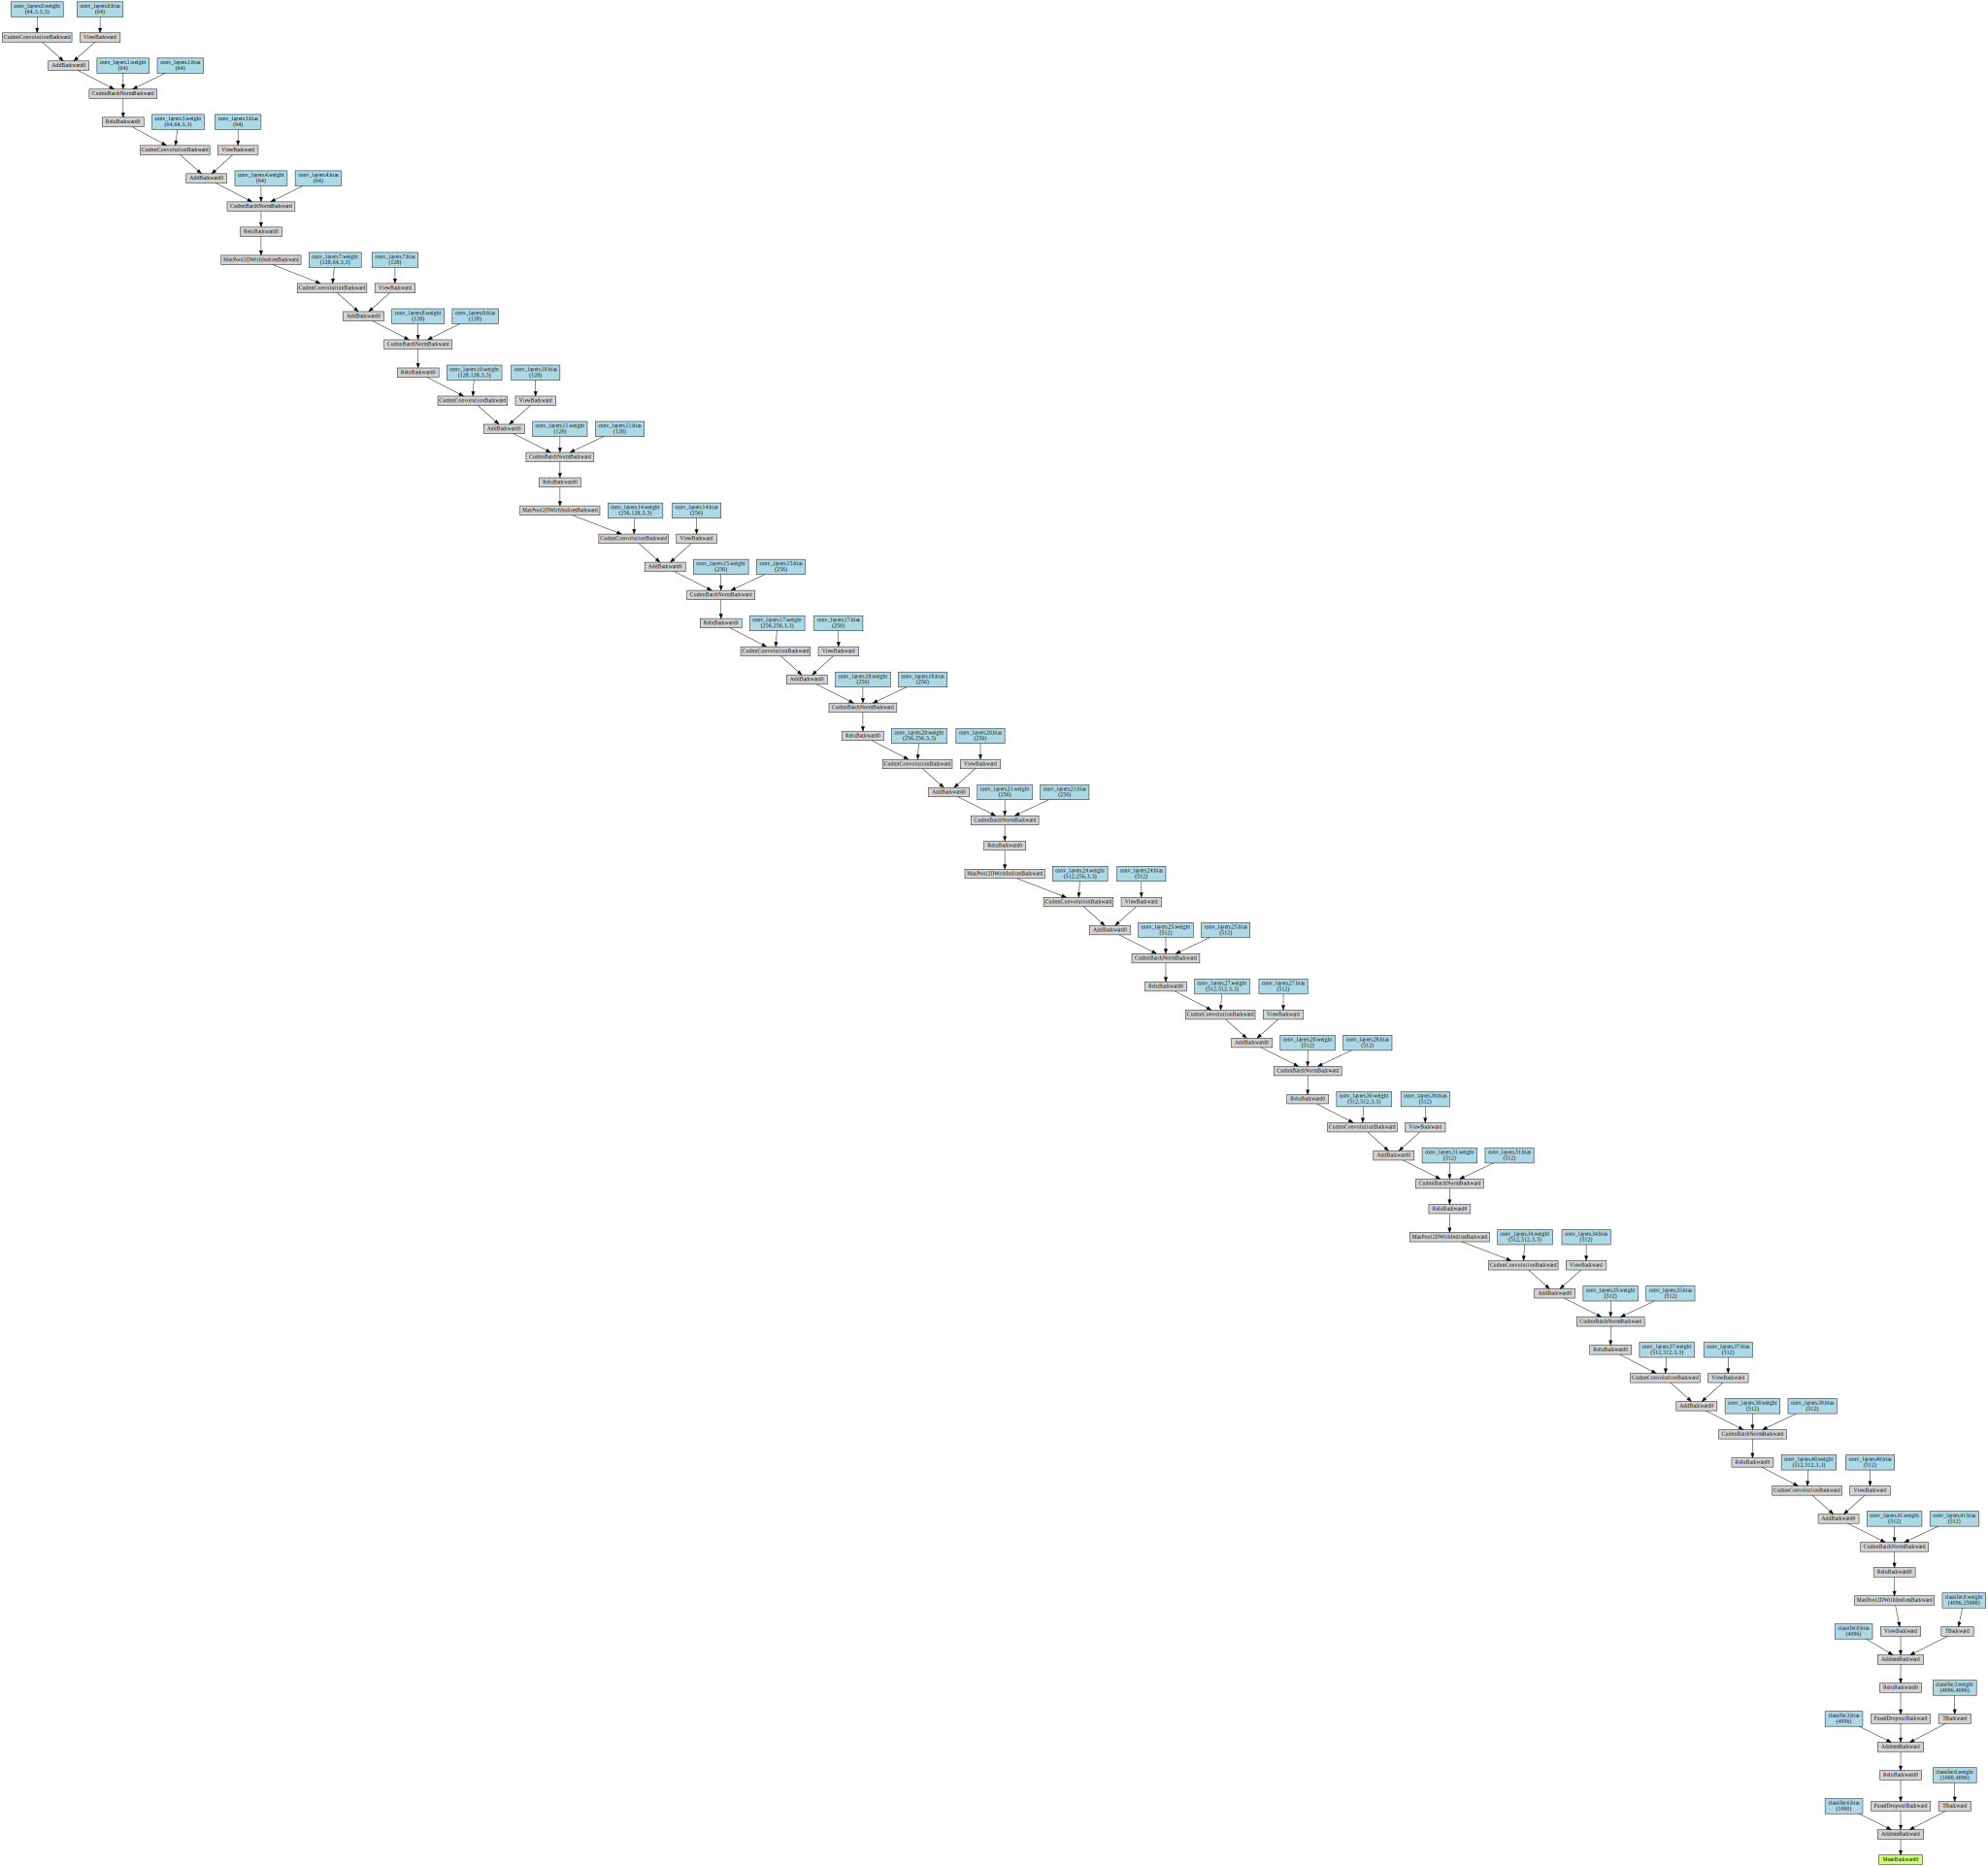

In [ ]:
y = model(x)
make_dot(y.mean(), params = dict(model.named_parameters()))

In [ ]:
!pip install git+https://github.com/waleedka/hiddenlayer.git


  Cloning https://github.com/waleedka/hiddenlayer.git to /tmp/pip-req-build-uv0tly7_
  Running command git clone -q https://github.com/waleedka/hiddenlayer.git /tmp/pip-req-build-uv0tly7_
  Created wheel for hiddenlayer: filename=hiddenlayer-0.2-cp36-none-any.whl size=19775 sha256=09e0cfbf193e05fb44fe743b1c1120f488472b53721e8f61df8d3204c907cb6e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ct6h273_/wheels/49/bc/d1/938073704abdd049b3e4cdc6811c8f468d69fb5eecc6e01748
Successfully built hiddenlayer
